# Predictive Modeling for Disease Diagnosis

**Project Done By:**    **MAHAMMAD BASHEER K S, E-mail: bacchianc@gmail.com**  

**DATE:**    ***19-05-2024***

## Overview:

In this notebook, we aim to develop a predictive model for disease diagnosis using machine learning techniques. The ability to accurately predict diseases can significantly impact healthcare outcomes by enabling early detection and intervention, thereby improving patient prognosis and reducing healthcare costs.

### Objective:
Our primary objective is to build a predictive model capable of accurately identifying the presence or absence of a particular disease based on a set of input features. 

### Dataset:
We will be using a dataset containing relevant features such as demographic information, medical history, laboratory test results, and other pertinent variables. This dataset will serve as the basis for training and evaluating our predictive model.

### Methodology:
1. **Data Preprocessing:** We will begin by exploring and preprocessing the dataset. This includes handling missing values, encoding categorical variables, and scaling numerical features as necessary.
2. **Feature Selection/Engineering:** Next, we will perform feature selection or engineering to identify the most relevant features for our predictive model. This step aims to enhance model performance and reduce dimensionality.
3. **Model Selection:** We will experiment with various machine learning algorithms such as logistic regression, decision trees, random forests, support vector machines, and neural networks to determine the most suitable model for our task.
4. **Model Training:** After selecting the appropriate model, we will train it using the preprocessed dataset.
5. **Model Evaluation:** We will evaluate the performance of the trained model using relevant evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC curve. This step helps assess the model's predictive power and generalization capability.
6. **Model Tuning:** If necessary, we will fine-tune hyperparameters and perform cross-validation to optimize the model's performance further.
7. **Model Interpretation:** Finally, we will interpret the results and gain insights into the factors contributing to disease diagnosis predictions.

### Conclusion:
By the end of this notebook, we aim to have developed a robust predictive model that can effectively assist healthcare professionals in diagnosing diseases accurately and efficiently.

---

### 1.1 Importing necessary libraries

In [1]:
# Let's import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the training dataset
data_train=pd.read_csv('Train_data.csv')

In [3]:
data_train.head(10)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
5,0.898222,0.258706,0.933307,0.353082,0.373952,0.297138,0.900010,0.985488,0.679007,0.355774,...,0.389461,0.529914,0.222687,0.772461,0.119994,0.894273,0.128124,0.379016,0.751438,Diabetes
6,0.353734,0.757757,0.755007,0.012594,0.227684,0.425117,0.387461,0.461418,0.305588,0.741120,...,0.446854,0.729376,0.615543,0.794735,0.233890,0.612188,0.407891,0.426863,0.532100,Thromboc
7,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,Thromboc
8,0.722428,0.300282,0.487907,0.200865,0.402035,0.729285,0.851338,0.820546,0.106637,0.006947,...,0.022621,0.061317,0.644191,0.715823,0.417170,0.639148,0.213026,0.549920,0.036800,Thalasse
9,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,Thromboc


In [4]:
# Checking for missing values in the training dataset
data_train.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [5]:
# Displaying information about the training dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

Except for the 'Disease' column, all columns are of float datatype. The 'Disease' column needs to be encoded for further analysis.

In [6]:
# Generating descriptive statistics of the training dataset
data_train.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


The dataset statistics indicate that the data is clean. Next, let's visualize the distribution of the data.

In [7]:
# Displaying the number of columns and their names in the training dataset
print("Number of Columns:", len(data_train.columns))
data_train.columns

Number of Columns: 25


Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

# Data Visualization

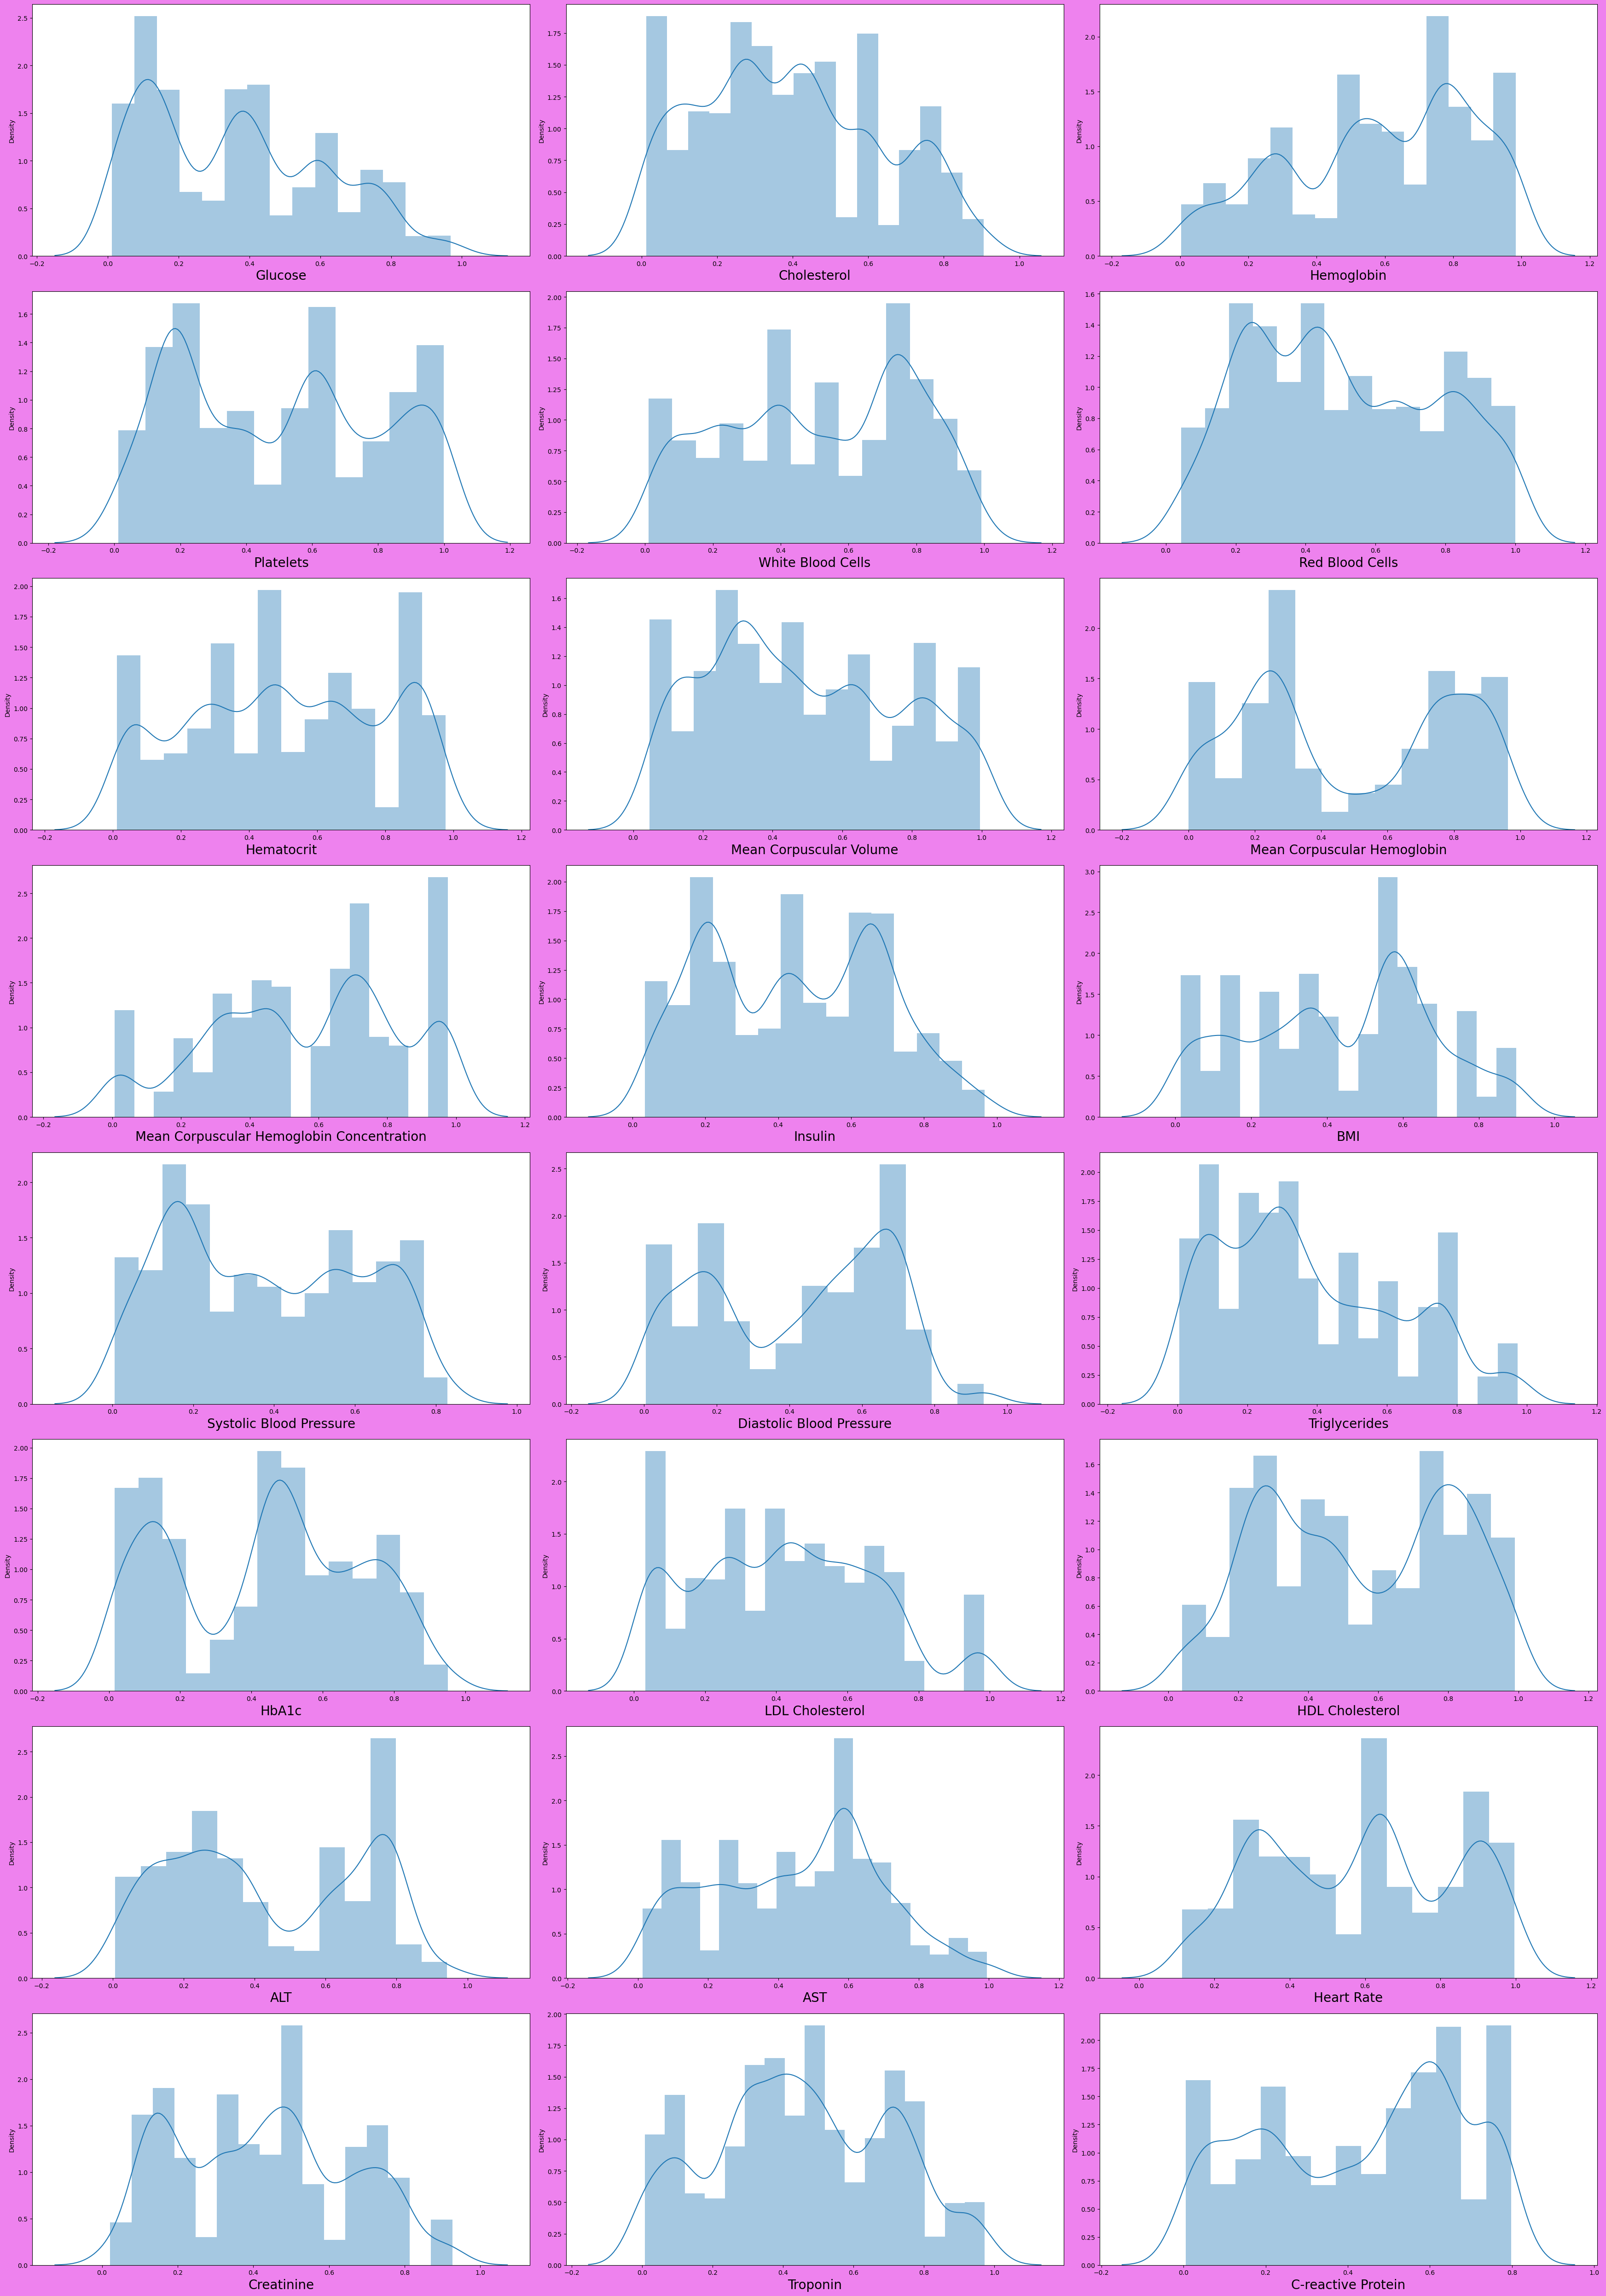

In [8]:
# let's see how data is distributed for every column

plt.figure(figsize=(35,50),facecolor='violet')
plotnumber=1

for column in data_train:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

# Save the plot
plt.savefig('distribution_Disease_plot.png', dpi=300, bbox_inches='tight')
plt.show()

The plot shows the distribution of each column in the dataset, indicating that there is no significant skewness present.

In [9]:
# Importing the skew function from the scipy.stats module
from scipy.stats import skew

In [10]:
# Extracting features by removing the 'Disease' column
features=data_train.drop('Disease',axis=1)

In [11]:
# Calculating and displaying the skewness for each feature column
for column in features:
    print(f"{column} Skewness:-----------------   {data_train[column].skew()}")

Glucose Skewness:-----------------   0.41454588662221487
Cholesterol Skewness:-----------------   0.25540057659789495
Hemoglobin Skewness:-----------------   -0.39477650064425795
Platelets Skewness:-----------------   0.12481055729419639
White Blood Cells Skewness:-----------------   -0.15183954682545167
Red Blood Cells Skewness:-----------------   0.21862074929513792
Hematocrit Skewness:-----------------   -0.07312437790066291
Mean Corpuscular Volume Skewness:-----------------   0.22791360055515236
Mean Corpuscular Hemoglobin Skewness:-----------------   0.04522392758087515
Mean Corpuscular Hemoglobin Concentration Skewness:-----------------   -0.2488628578002947
Insulin Skewness:-----------------   0.09712126278660313
BMI Skewness:-----------------   -0.08456966690872131
Systolic Blood Pressure Skewness:-----------------   0.1560155338733811
Diastolic Blood Pressure Skewness:-----------------   -0.15232972937530628
Triglycerides Skewness:-----------------   0.5085099198902313
HbA1c S

The skewness values for each column in the dataset indicate that there is no significant skewness present.

Since The data shows minimal skewness across all columns. It is suitable for further analysis without the need for additional transformations to address skewness.

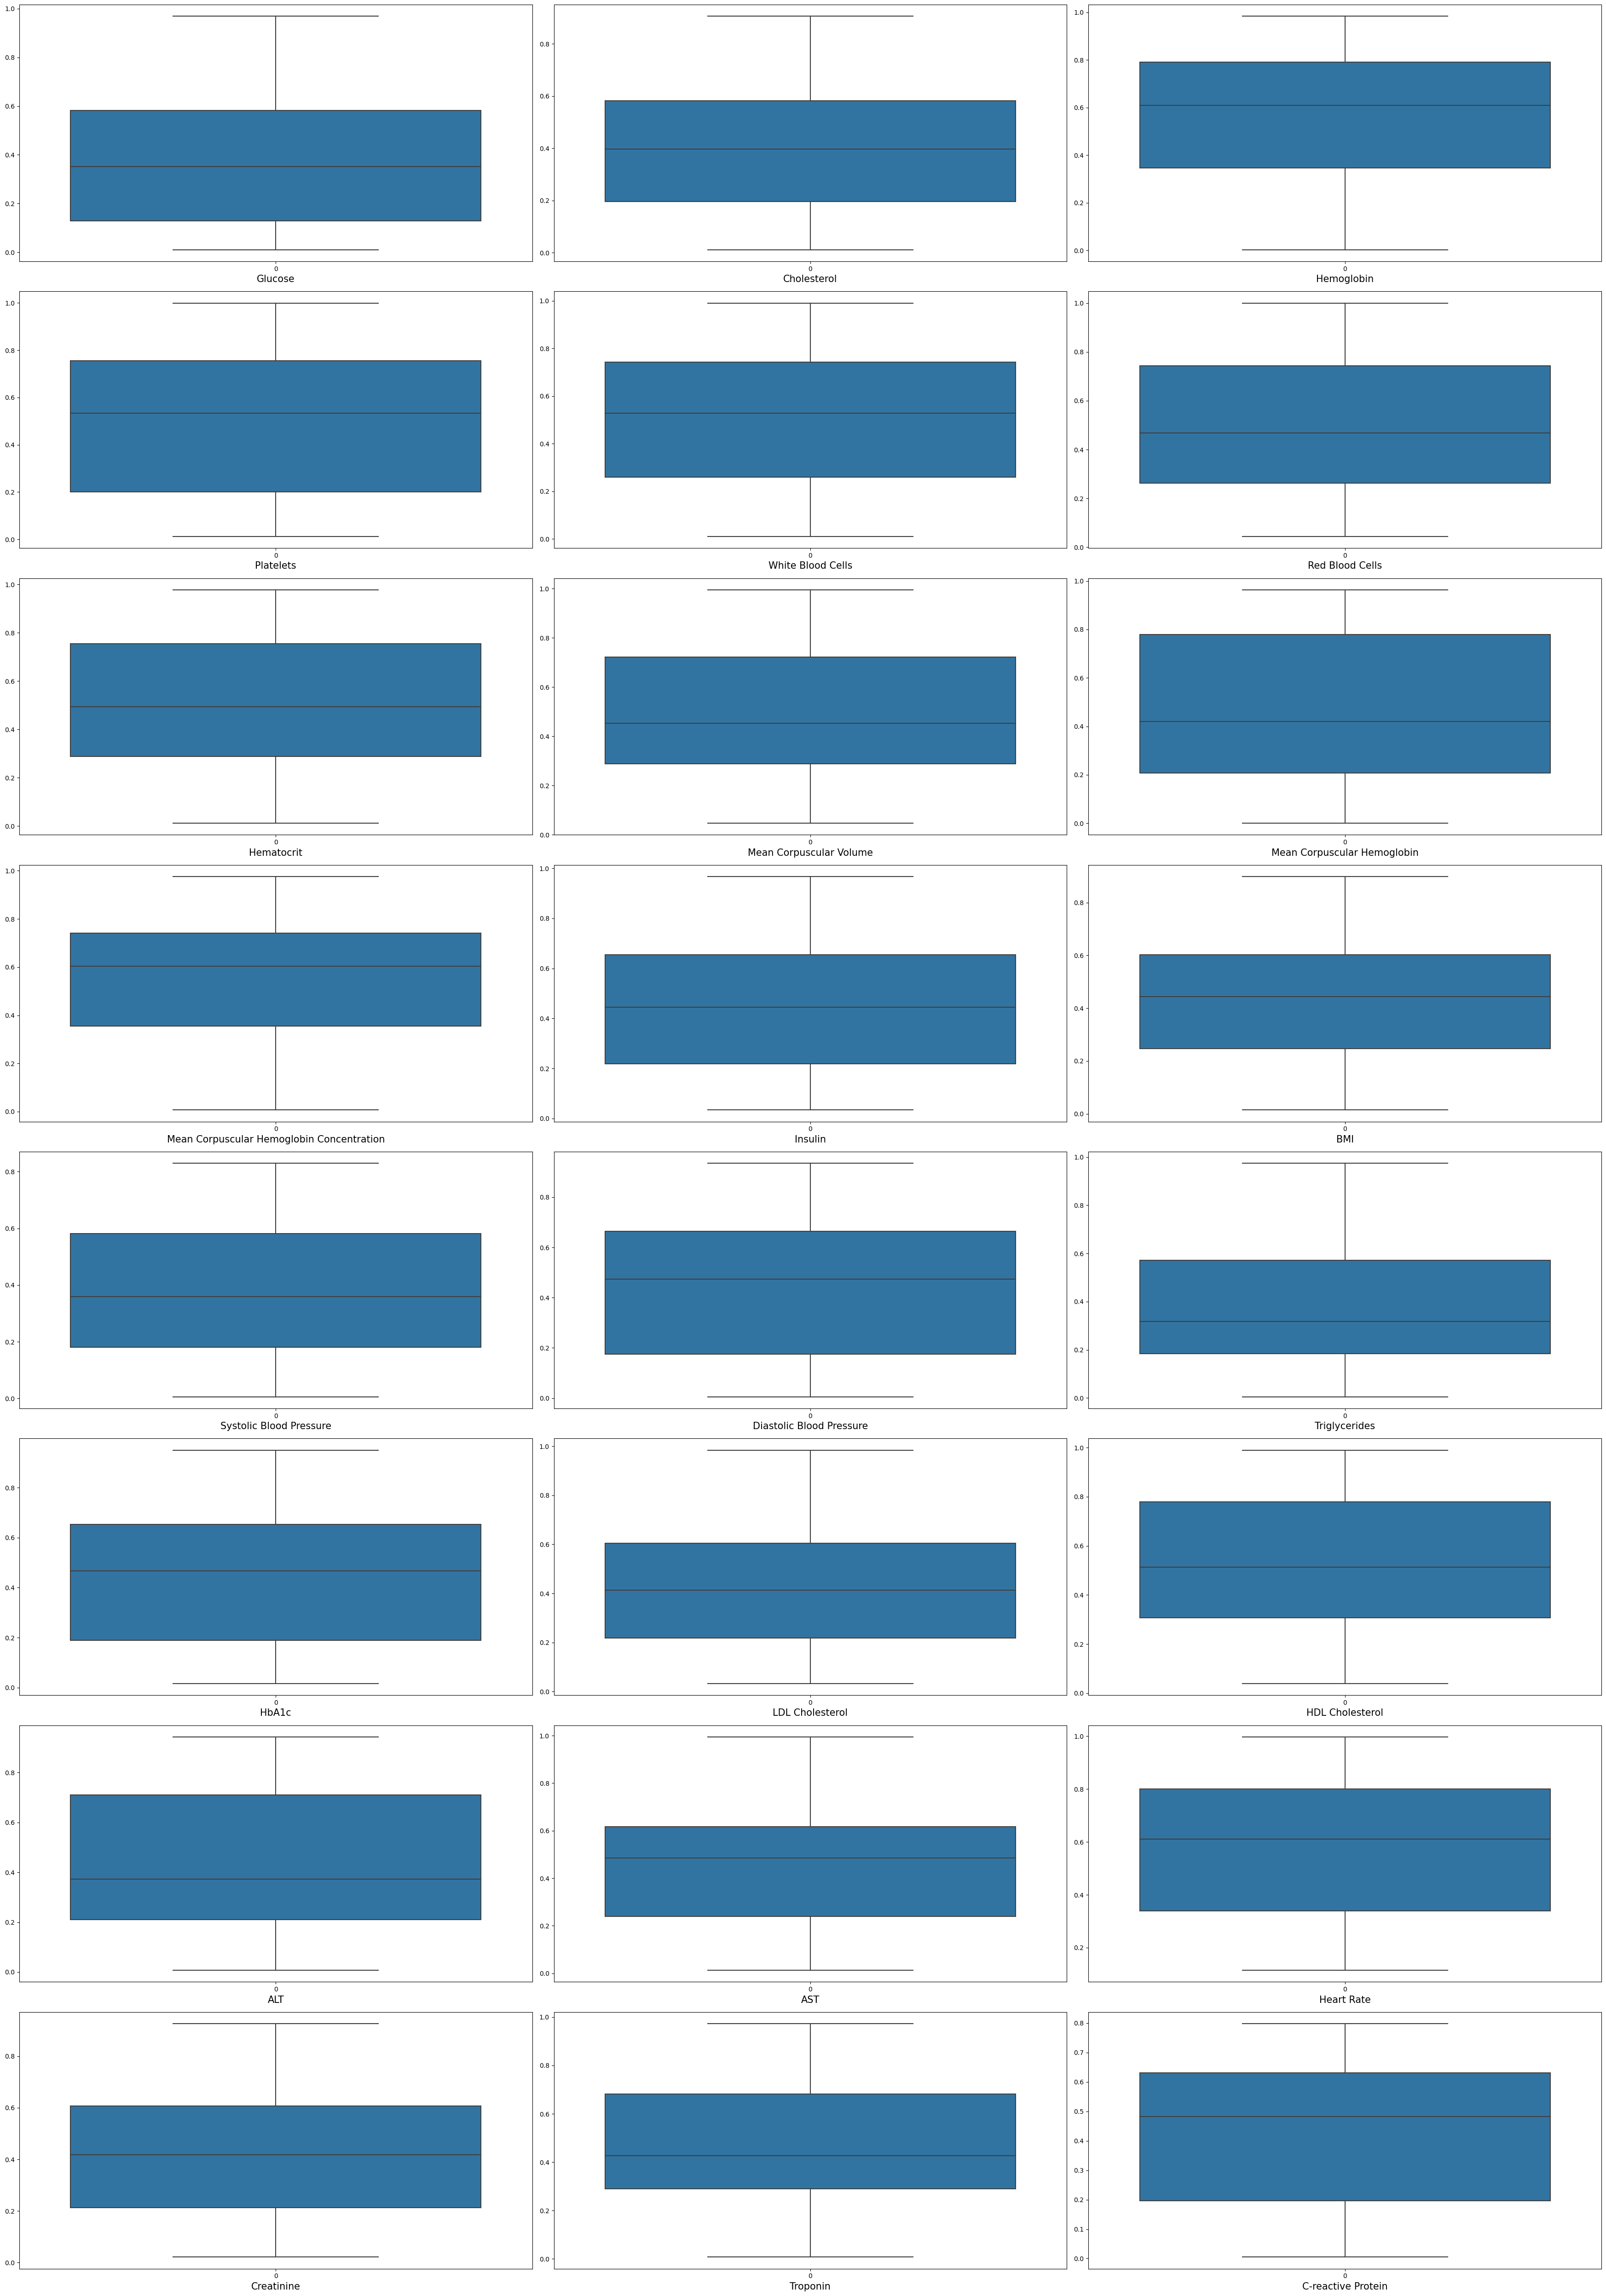

In [12]:
# Visualize the outliers using boxplot
plt.figure(figsize=(35,50))
graph = 1

for column in features:
    if graph<=24:    
        plt.subplot(8,3,graph)
        ax=sns.boxplot(data= features[column])
        plt.xlabel(column,fontsize=15)      
    graph+=1
plt.tight_layout()

#save the figure
plt.savefig('boxplot_for_disease_data.png', dpi=300, bbox_inches='tight')
plt.show()

The boxplots suggest that the dataset has a relatively balanced distribution for most features, with no extreme outliers. This indicates that the data is generally clean and suitable for further analysis, including building predictive models. The moderate spread in most features suggests a good range of variability, which is beneficial for model training. We can proceed with encoding the labels and building predictive models.

In [13]:
# Counting the occurrences of each class in the 'Disease' column
data_train['Disease'].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

**Note:** The 'Disease' column exhibits a breakdown of classes as follows:
- Anemia: 623 occurrences
- Healthy: 556 occurrences
- Diabetes: 540 occurrences
- Thalassemia: 509 occurrences
- Thrombocytopenia: 123 occurrences

This summary provides an overview of the distribution of disease classes within the dataset.

**Correction of Label Names:**

In the label column of our dataset, the names **"Thalasse"** and **"Thromboc"** are mentioned, but the actual names should be **"Thalassemia"** and **"Thrombocytopenia,"** respectively. Please consider them as their actual names.

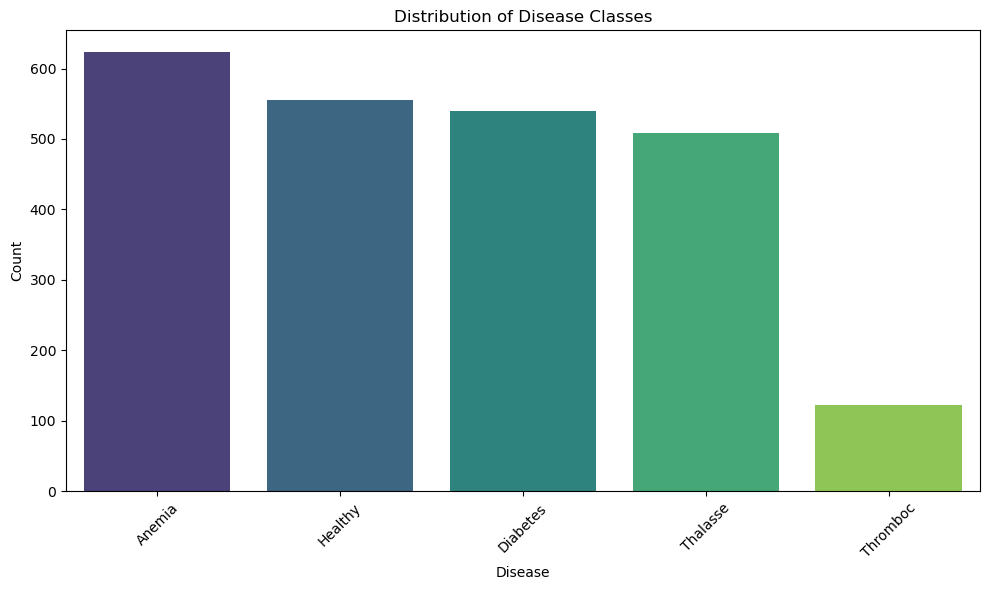

In [14]:
# Counting the occurrences of each class in the 'Disease' column
disease_counts = data_train['Disease'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')
plt.title('Distribution of Disease Classes')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image
plt.savefig('disease_class_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [15]:
# Identify the majority class
majority_class = data_train['Disease'].value_counts().idxmax()
max_count = data_train['Disease'].value_counts().max()

In [16]:
majority_class

'Anemia'

In [17]:
max_count

623

In [18]:
from sklearn.utils import resample
from collections import Counter

df = data_train

# Separate features and target
X = df.drop(columns=['Disease'])
y = df['Disease']

# Combine X and y for resampling
df_combined = pd.concat([X, y], axis=1)

# Identify the maximum count from the other classes
max_count = df_combined['Disease'].value_counts().max()

# Perform random over-sampling for only the 'Thromboc' class
resampled_dfs = [df_combined[df_combined['Disease'] != 'Thromboc']]

thromboc_df = df_combined[df_combined['Disease'] == 'Thromboc']
resampled_thromboc_df = resample(thromboc_df,
                                 replace=True,
                                 n_samples=max_count,
                                 random_state=42)
resampled_dfs.append(resampled_thromboc_df)

# Concatenate all resampled dataframes
df_resampled = pd.concat(resampled_dfs)

# Separate features and target
X_resampled = df_resampled.drop(columns=['Disease'])
y_resampled = df_resampled['Disease']

# Verify the new distribution
print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled))

Original dataset shape: Counter({'Anemia': 623, 'Healthy': 556, 'Diabetes': 540, 'Thalasse': 509, 'Thromboc': 123})
Resampled dataset shape: Counter({'Anemia': 623, 'Thromboc': 623, 'Healthy': 556, 'Diabetes': 540, 'Thalasse': 509})


**Original Dataset Shape:**  
The dataset was imbalanced with varying numbers of instances across different classes.  

**Resampling Method:**  
We used random over-sampling to duplicate instances from minority classes.  

**Resampled Dataset Shape:**  
After resampling, all classes have an equal number of instances, ensuring that the dataset is balanced.
By balancing the dataset, we aim to improve the performance of our machine learning model, reducing bias towards the majority class and enhancing its ability to learn from all classes equally.

In [19]:
df_resampled['Disease'].value_counts()

Disease
Anemia      623
Thromboc    623
Healthy     556
Diabetes    540
Thalasse    509
Name: count, dtype: int64

The dataset successfully balanced, we can now proceed with further data preprocessing steps.

In [20]:
data_train=df_resampled
data_train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [21]:
# Importing LabelEncoder from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

In [22]:
# Instantiating the LabelEncoder
encoder=LabelEncoder()

In [23]:
# Encoding the 'Disease' column using LabelEncoder
for i in ['Disease']:
    data_train[i]=encoder.fit_transform(data_train[i])
    print('Column:',i,'----',encoder.classes_)

Column: Disease ---- ['Anemia' 'Diabetes' 'Healthy' 'Thalasse' 'Thromboc']


Note: After encoding the 'Disease' column using LabelEncoder, the classes are mapped as follows:
- Anemia: 0
- Diabetes: 1
- Healthy: 2
- Thalassemia: 3
- Thrombocytopenia: 4

This encoding facilitates numerical representation of categorical data, enabling compatibility with machine learning algorithms.

In the label column, the names "Thalasse" and "Thromboc" are mentioned, but the actual names are "Thalassemia" and "Thrombocytopenia," respectively. Please consider them as their actual names.

In [24]:
data_train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,2
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,3
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,0
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,3


In [25]:
data_train['Disease'].value_counts()

Disease
0    623
4    623
2    556
1    540
3    509
Name: count, dtype: int64

In [26]:
data_train.shape

(2851, 25)

# Heat Map: Correlation

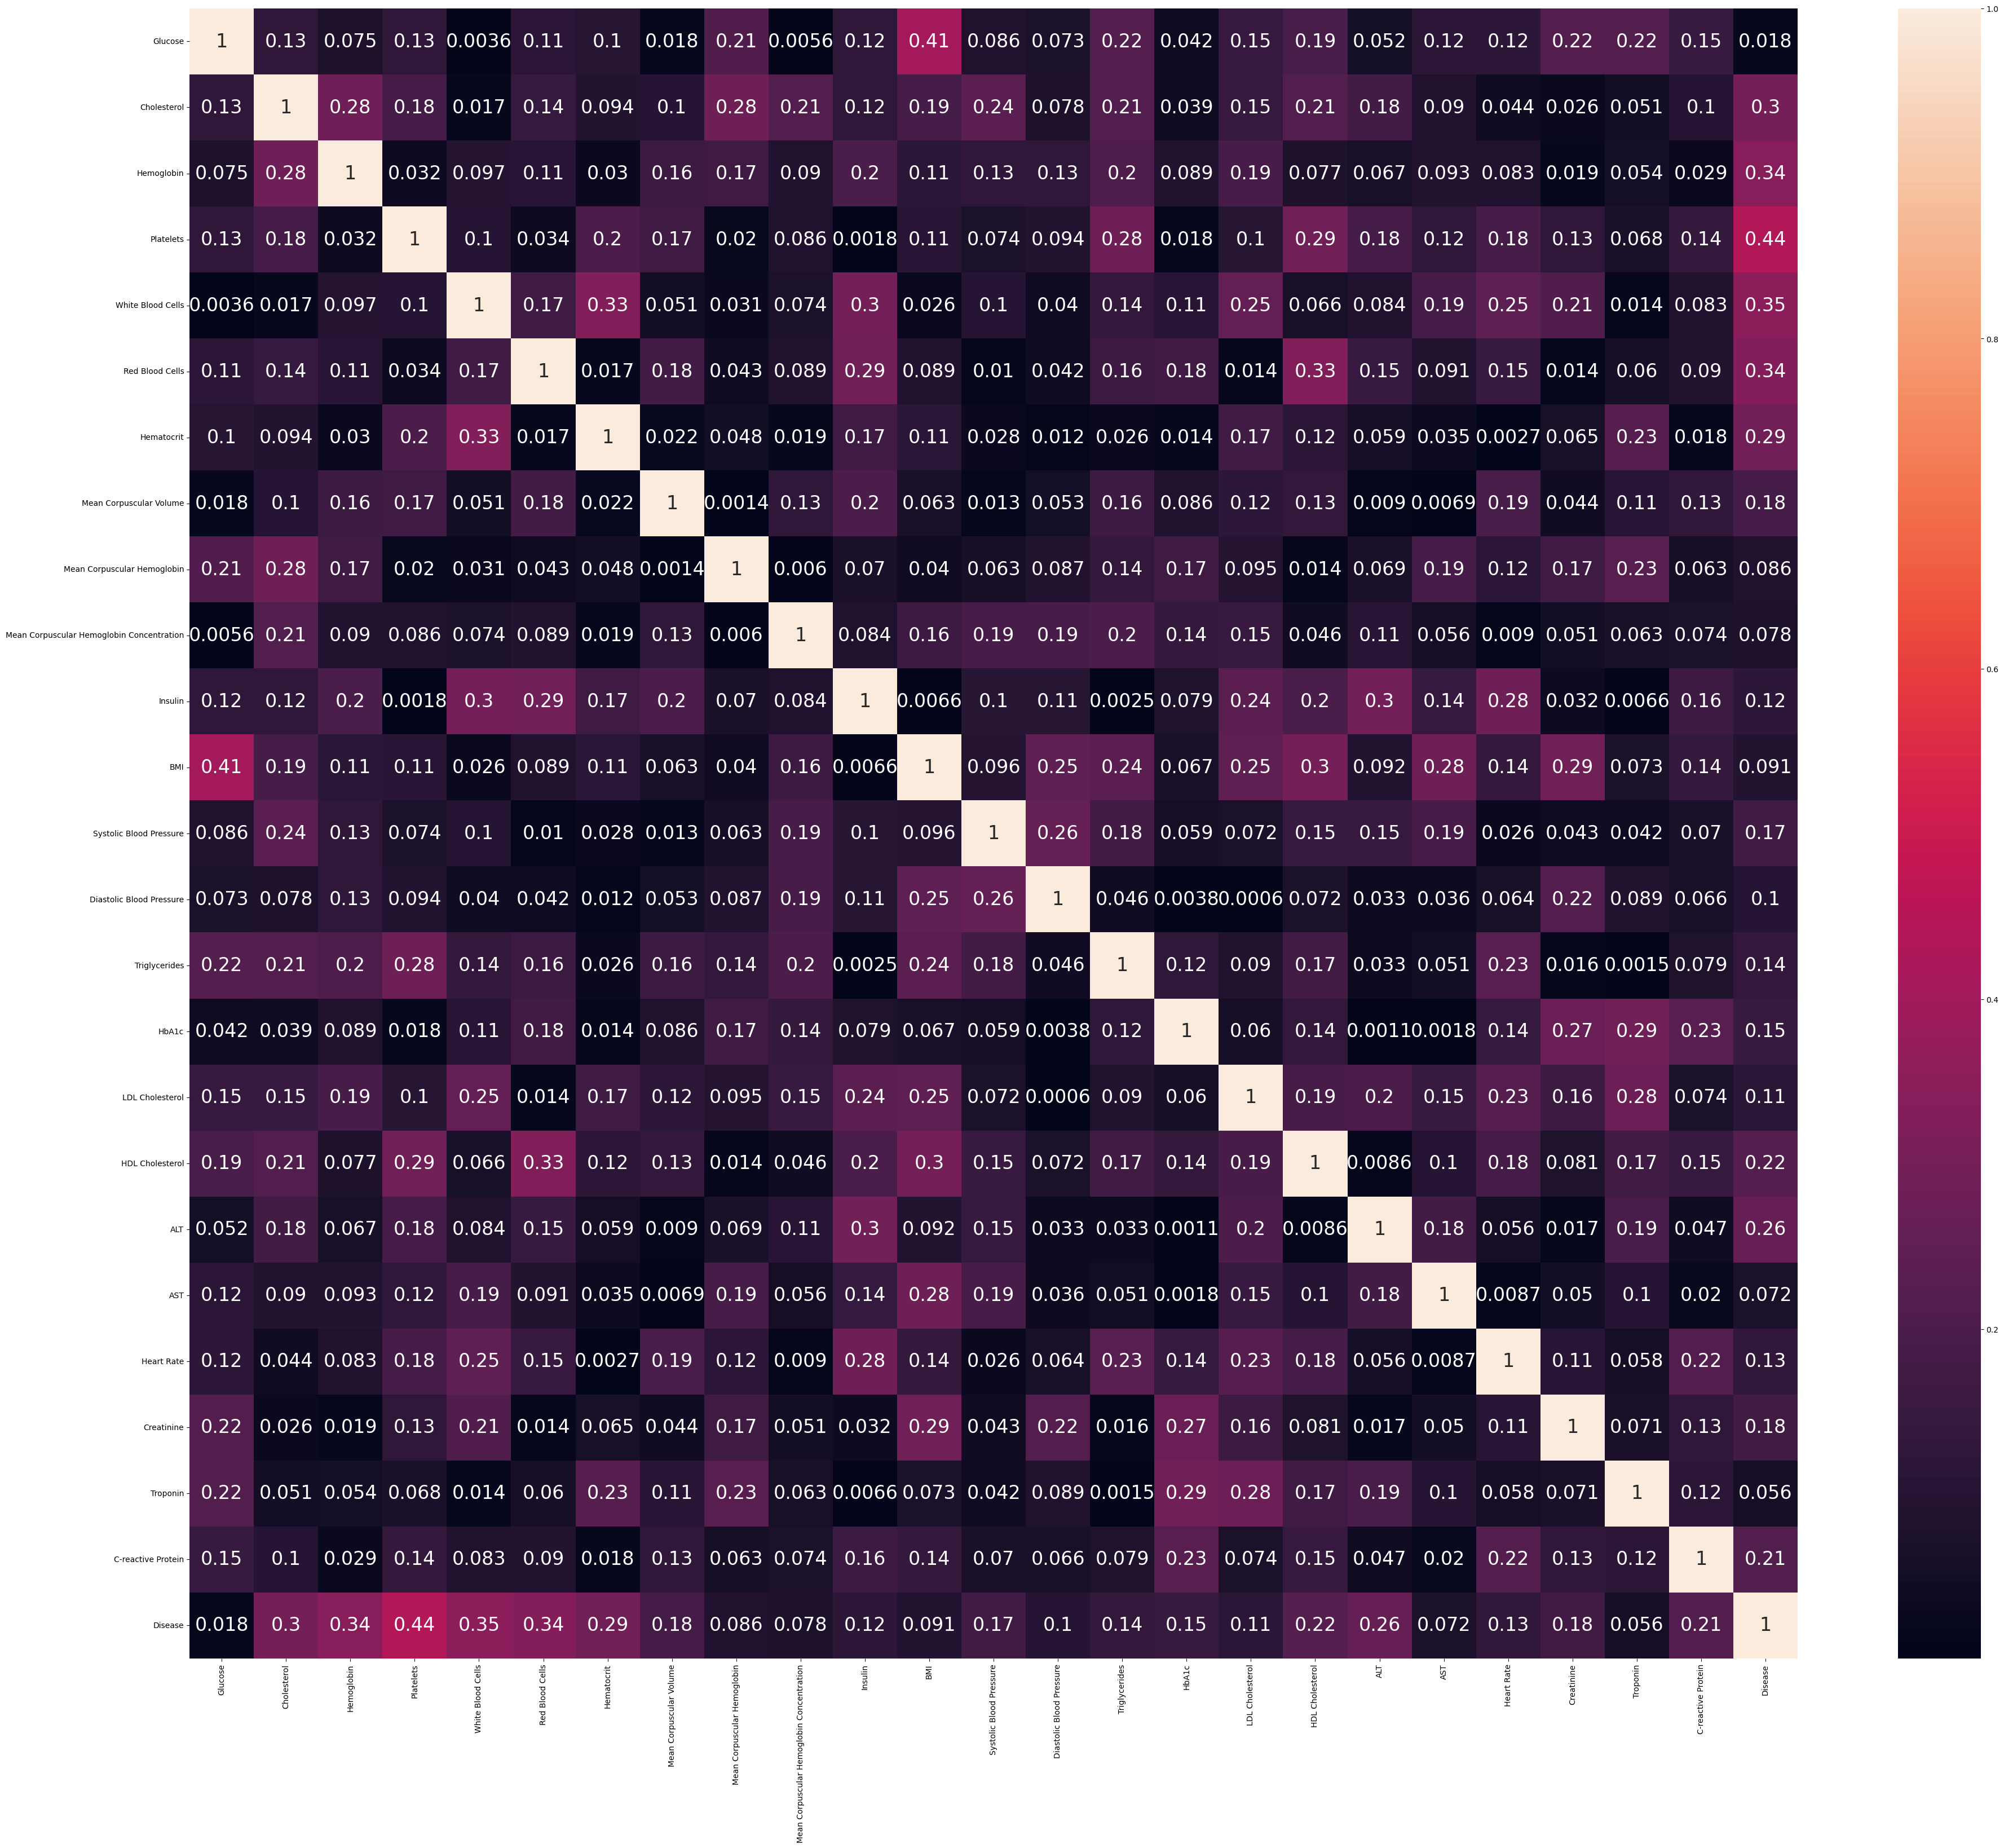

In [27]:
# Calculating the absolute correlation coefficients between variables in the dataset
data_corr = data_train.corr().abs()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(46, 38))
sns.heatmap(data_corr,annot=True,  annot_kws={'size':24})
plt.savefig('heatmap_disease_data.png', dpi=300, bbox_inches='tight')
plt.show()

The heatmap illustrates the absolute correlation coefficients between variables in the dataset. Each cell in the heatmap represents the strength of the correlation between two variables, with darker shades indicating stronger correlations. This visualization aids in identifying potential relationships and dependencies between different features, assisting in feature selection and model building processes.

In [28]:
# Calculating the correlation of features with the target variable 'Disease'
correlation = data_train.corr()
print(correlation['Disease'].sort_values(ascending=False))

Disease                                      1.000000
White Blood Cells                            0.351207
Hemoglobin                                   0.343559
Red Blood Cells                              0.336261
Cholesterol                                  0.299385
Hematocrit                                   0.287892
ALT                                          0.263744
HDL Cholesterol                              0.219382
C-reactive Protein                           0.213124
Creatinine                                   0.175839
HbA1c                                        0.149774
Triglycerides                                0.136479
Heart Rate                                   0.130165
Mean Corpuscular Hemoglobin                  0.086445
Mean Corpuscular Hemoglobin Concentration    0.077952
Troponin                                     0.056459
Glucose                                     -0.017511
AST                                         -0.072209
BMI                         

The correlation coefficients between the 'Disease' column and other features reveal the strength and direction of their relationships. A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. Features with higher positive correlations may have a stronger influence on the presence of disease, while those with negative correlations may have a mitigating effect. This analysis aids in identifying potential predictors of disease and understanding their impact on the target variable.

In [29]:
data_train.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [30]:
# features to remove
features_to_remove = [
    'Creatinine',
    'HbA1c',
    'Triglycerides',
    'Heart Rate',
    'Mean Corpuscular Hemoglobin',
    'Mean Corpuscular Hemoglobin Concentration',
    'Troponin',
    'Glucose',
    'AST',
    'BMI',
    'Diastolic Blood Pressure',
    'LDL Cholesterol',
    'Insulin',
    'Systolic Blood Pressure'
]

# Removing the features from the DataFrame
data_train = data_train.drop(columns=features_to_remove)

print('Number of columns removed:',len(features_to_remove))
data_train.head()

Number of columns removed: 14


,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,HDL Cholesterol,ALT,C-reactive Protein,Disease
0,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.512941,0.064187,0.769230,2
1,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.106961,0.942549,0.401166,1
2,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.421763,0.007186,0.779208,3
3,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.826721,0.265415,0.354094,0
4,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.221574,0.015280,0.094970,3


**Note:** The listed columns are being removed from the dataset:
- 'Creatinine'
- 'Triglycerides'
- 'Mean Corpuscular Hemoglobin'
- 'Mean Corpuscular Hemoglobin Concentration'
- 'Troponin'
-  'Glucose'
- 'AST'
- 'BMI'
- 'Diastolic Blood Pressure'
- 'LDL Cholesterol'
- 'Insulin'
- 'Systolic Blood Pressure'

This decision is based on their relatively lower correlation coefficients with the target variable 'Disease', indicating weaker associations with the presence of disease. By eliminating these features, the dataset is streamlined to focus on more influential predictors of disease.

In [31]:
# Displaying the number of columns and their names in the training dataset
print('No. of columns:',len(data_train.columns))
data_train.columns

No. of columns: 11


Index(['Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells',
       'Red Blood Cells', 'Hematocrit', 'Mean Corpuscular Volume',
       'HDL Cholesterol', 'ALT', 'C-reactive Protein', 'Disease'],
      dtype='object')

**Note:** The count of columns in the training dataset along with their respective names. It helps in verifying the dataset structure after column removal.

## Test Dataset

In [32]:
# Loading the test dataset
data_test=pd.read_csv('test_data.csv')
data_test.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [33]:
# Displaying information about the test dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [34]:
data_test.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.490044,0.506797,0.485502,0.528136,0.509783,0.504347,0.501042,0.516185,0.510145,0.501105,...,0.498538,0.489365,0.501706,0.487933,0.500615,0.499675,0.493794,0.515541,0.510077,0.517365
std,0.284196,0.282871,0.298818,0.292610,0.290887,0.302865,0.294501,0.279954,0.285213,0.290614,...,0.288848,0.290849,0.286729,0.292726,0.285374,0.301451,0.292400,0.287223,0.294011,0.291645
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.236664,0.268021,0.201994,0.276155,0.264944,0.218573,0.246255,0.287755,0.259967,0.255839,...,0.238772,0.239302,0.262516,0.229095,0.251076,0.239369,0.228581,0.262924,0.267101,0.263192
50%,0.496471,0.502397,0.477706,0.538642,0.511102,0.518103,0.496275,0.533319,0.498332,0.493929,...,0.503164,0.481549,0.511373,0.481533,0.515321,0.497846,0.507581,0.526299,0.508479,0.546542
75%,0.727144,0.754638,0.750028,0.789486,0.767896,0.768466,0.761107,0.746765,0.761956,0.734817,...,0.749527,0.725472,0.756136,0.741867,0.739248,0.775458,0.751124,0.777839,0.781128,0.776940
max,0.991742,0.999606,0.997876,0.999507,0.999646,0.997267,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


In [35]:
# Displaying the number of columns and their names in the test dataset
print("Number of Columns:", len(data_test.columns))
data_test.columns

Number of Columns: 25


Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [36]:
data_test['Disease'].value_counts()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64

In [37]:
# Value to be removed
value_to_remove = 'Heart Di'

# Remove rows where 'Disease' column has the value 'Heart Di'
data_test = data_test[data_test['Disease'] != value_to_remove]

**Note:**   
The value **'Heart Di'** is being removed from the **'Disease'** column in the test dataset. This decision is made because this particular value is not present in the training dataset. Consistency in the values of the target variable between the training and test datasets ensures the reliability and effectiveness of predictive models trained on the training data.

In [38]:
# Counting the occurrences of each class in the 'Disease' column of the test dataset
data_test['Disease'].value_counts()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Thromboc     16
Healthy       5
Name: count, dtype: int64

In [39]:
# Encoding the 'Disease' column in the test dataset using LabelEncoder
for i in ['Disease']:
    data_test[i]=encoder.fit_transform(data_test[i])
    print('Column:',i,'----',encoder.classes_)

Column: Disease ---- ['Anemia' 'Diabetes' 'Healthy' 'Thalasse' 'Thromboc']


**Note:**  
After encoding the 'Disease' column in the test dataset using LabelEncoder, the classes are mapped as follows:
- Anemia: 0
- Diabetes: 1
- Healthy: 2
- Thalassemia: 3
- Thrombocytopenia: 4

This encoding ensures consistency with the encoding performed on the training dataset, facilitating model compatibility and predictions across both datasets.  

In the label column, the names "Thalasse" and "Thromboc" are mentioned, but the actual names are "Thalassemia" and "Thrombocytopenia," respectively. Please consider them as their actual names.

In [40]:
print('No. of columns:',len(data_test.columns))
data_test.columns

No. of columns: 25


Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [41]:
# Removing the features from the DataFrame
data_test = data_test.drop(columns=features_to_remove)

print('Number of columns removed:',len(features_to_remove))
data_test.head()

Number of columns removed: 14


,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,HDL Cholesterol,ALT,C-reactive Protein,Disease
0,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.430398,0.016678,0.031313,3
1,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.458533,0.401845,0.594123,1
3,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.420154,0.798537,0.242766,1
6,0.435037,0.572571,0.965847,0.010580,0.753719,0.262138,0.789804,0.355437,0.468168,0.231356,1
7,0.177558,0.169041,0.679138,0.886839,0.714977,0.197501,0.778653,0.867800,0.213141,0.645990,1


**Note:**  
The features are being removed from the test dataset because they were already removed from the training dataset. This ensures consistency between the datasets, allowing the model to work effectively with the same set of features in both training and testing phases.

In [42]:
# Displaying the number of columns and their names in the test dataset
print('No. of columns:',len(data_test.columns))
data_test.columns

No. of columns: 11


Index(['Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells',
       'Red Blood Cells', 'Hematocrit', 'Mean Corpuscular Volume',
       'HDL Cholesterol', 'ALT', 'C-reactive Protein', 'Disease'],
      dtype='object')

The test dataset along with their respective names. It helps in verifying the dataset structure after the removal of specified features.

## Train and Test Split

In [43]:
# Separating features (X) and target variable (y) from the balanced dataset.
x_train = data_train.drop(columns = ['Disease'])
y_train = data_train['Disease']

x_test = data_test.drop(columns = ['Disease'])
y_test = data_test['Disease']

**Note:**  
The features (X) and target variable (y) are being separated from both the training and test datasets. This step is crucial for preparing the data for model training and evaluation. The features (X) include all columns except 'Disease', while the target variable (y) is the 'Disease' column itself. By separating these, we create distinct inputs (X) and outputs (y) for our machine learning models.

### Decision Tree Model

In [44]:
# Initialize the Decision Tree Classifier model
DT_model = DecisionTreeClassifier()

# Train the model using the training dataset
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
# Making predictions on the test dataset using the trained Decision Tree model
y_pred_DT = DT_model.predict(x_test)
y_pred_DT

array([3, 3, 0, 0, 1, 0, 1, 2, 2, 1, 3, 1, 3, 0, 0, 0, 3, 1, 0, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 3, 1, 3, 1, 1, 3, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 2, 0, 3, 1, 0, 1, 3, 3, 4, 4, 0, 3, 0, 0, 3, 4, 0, 1,
       3, 0, 0, 1, 3, 0, 2, 3, 1, 4, 1, 3, 3, 0, 0, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 0, 3, 1, 3, 1, 0, 3, 1, 0, 3, 2, 0, 0, 3, 1, 1, 0, 1, 0, 0,
       3, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 3, 1, 0, 0, 1, 0, 1, 3, 3, 1, 3,
       3, 0, 4, 3, 3, 0, 2, 1, 0, 3, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3,
       0, 1, 1, 1, 2, 1, 0, 0, 3, 0, 0, 1, 2, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       1, 0, 2, 2, 0, 3, 0, 3, 1, 1, 0, 1, 1, 0, 3, 3, 1, 0, 0, 1, 1, 3,
       3, 2, 0, 0, 3, 3, 0, 1, 1, 1, 3, 0, 0, 3, 1, 3, 2, 2, 1, 3, 0, 0,
       0, 0, 1, 4, 3, 3, 1, 0, 1, 1, 2, 3, 3, 0, 3, 4, 1, 0, 1, 1, 0, 0,
       0, 1, 3, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 4, 2, 1, 3, 0, 1, 1, 3, 0,
       3, 2, 1, 0, 1, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 2, 1, 0, 0, 0, 3, 3,
       3, 0, 3, 3, 0, 1, 2, 0, 2, 3, 1, 3, 0, 0, 1,

**Note:**  
Predictions are being made on the test dataset using the trained Decision Tree model. The predicted values (y_pred_DT) represent the model's classification results for the test data based on the features provided. These predictions will be used to evaluate the model's performance against the actual target values (y_test).

In [46]:
# Importing the accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

In [47]:
# Calculating the accuracy score by comparing the predicted values (y_pred_DT) with the actual target values (y_test)
accuracy_DT=accuracy_score(y_test,y_pred_DT)
accuracy_DT

0.3825503355704698

**Note:**  
The accuracy score of the Decision Tree model on the test dataset is approximately 0.3982. This metric represents the proportion of correctly classified instances out of all instances in the test dataset.

In [48]:
# Extracting the names of features and classes
feature_name=list(x_train.columns)
class_name = list(y_train.unique())
feature_name

['Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'HDL Cholesterol',
 'ALT',
 'C-reactive Protein']

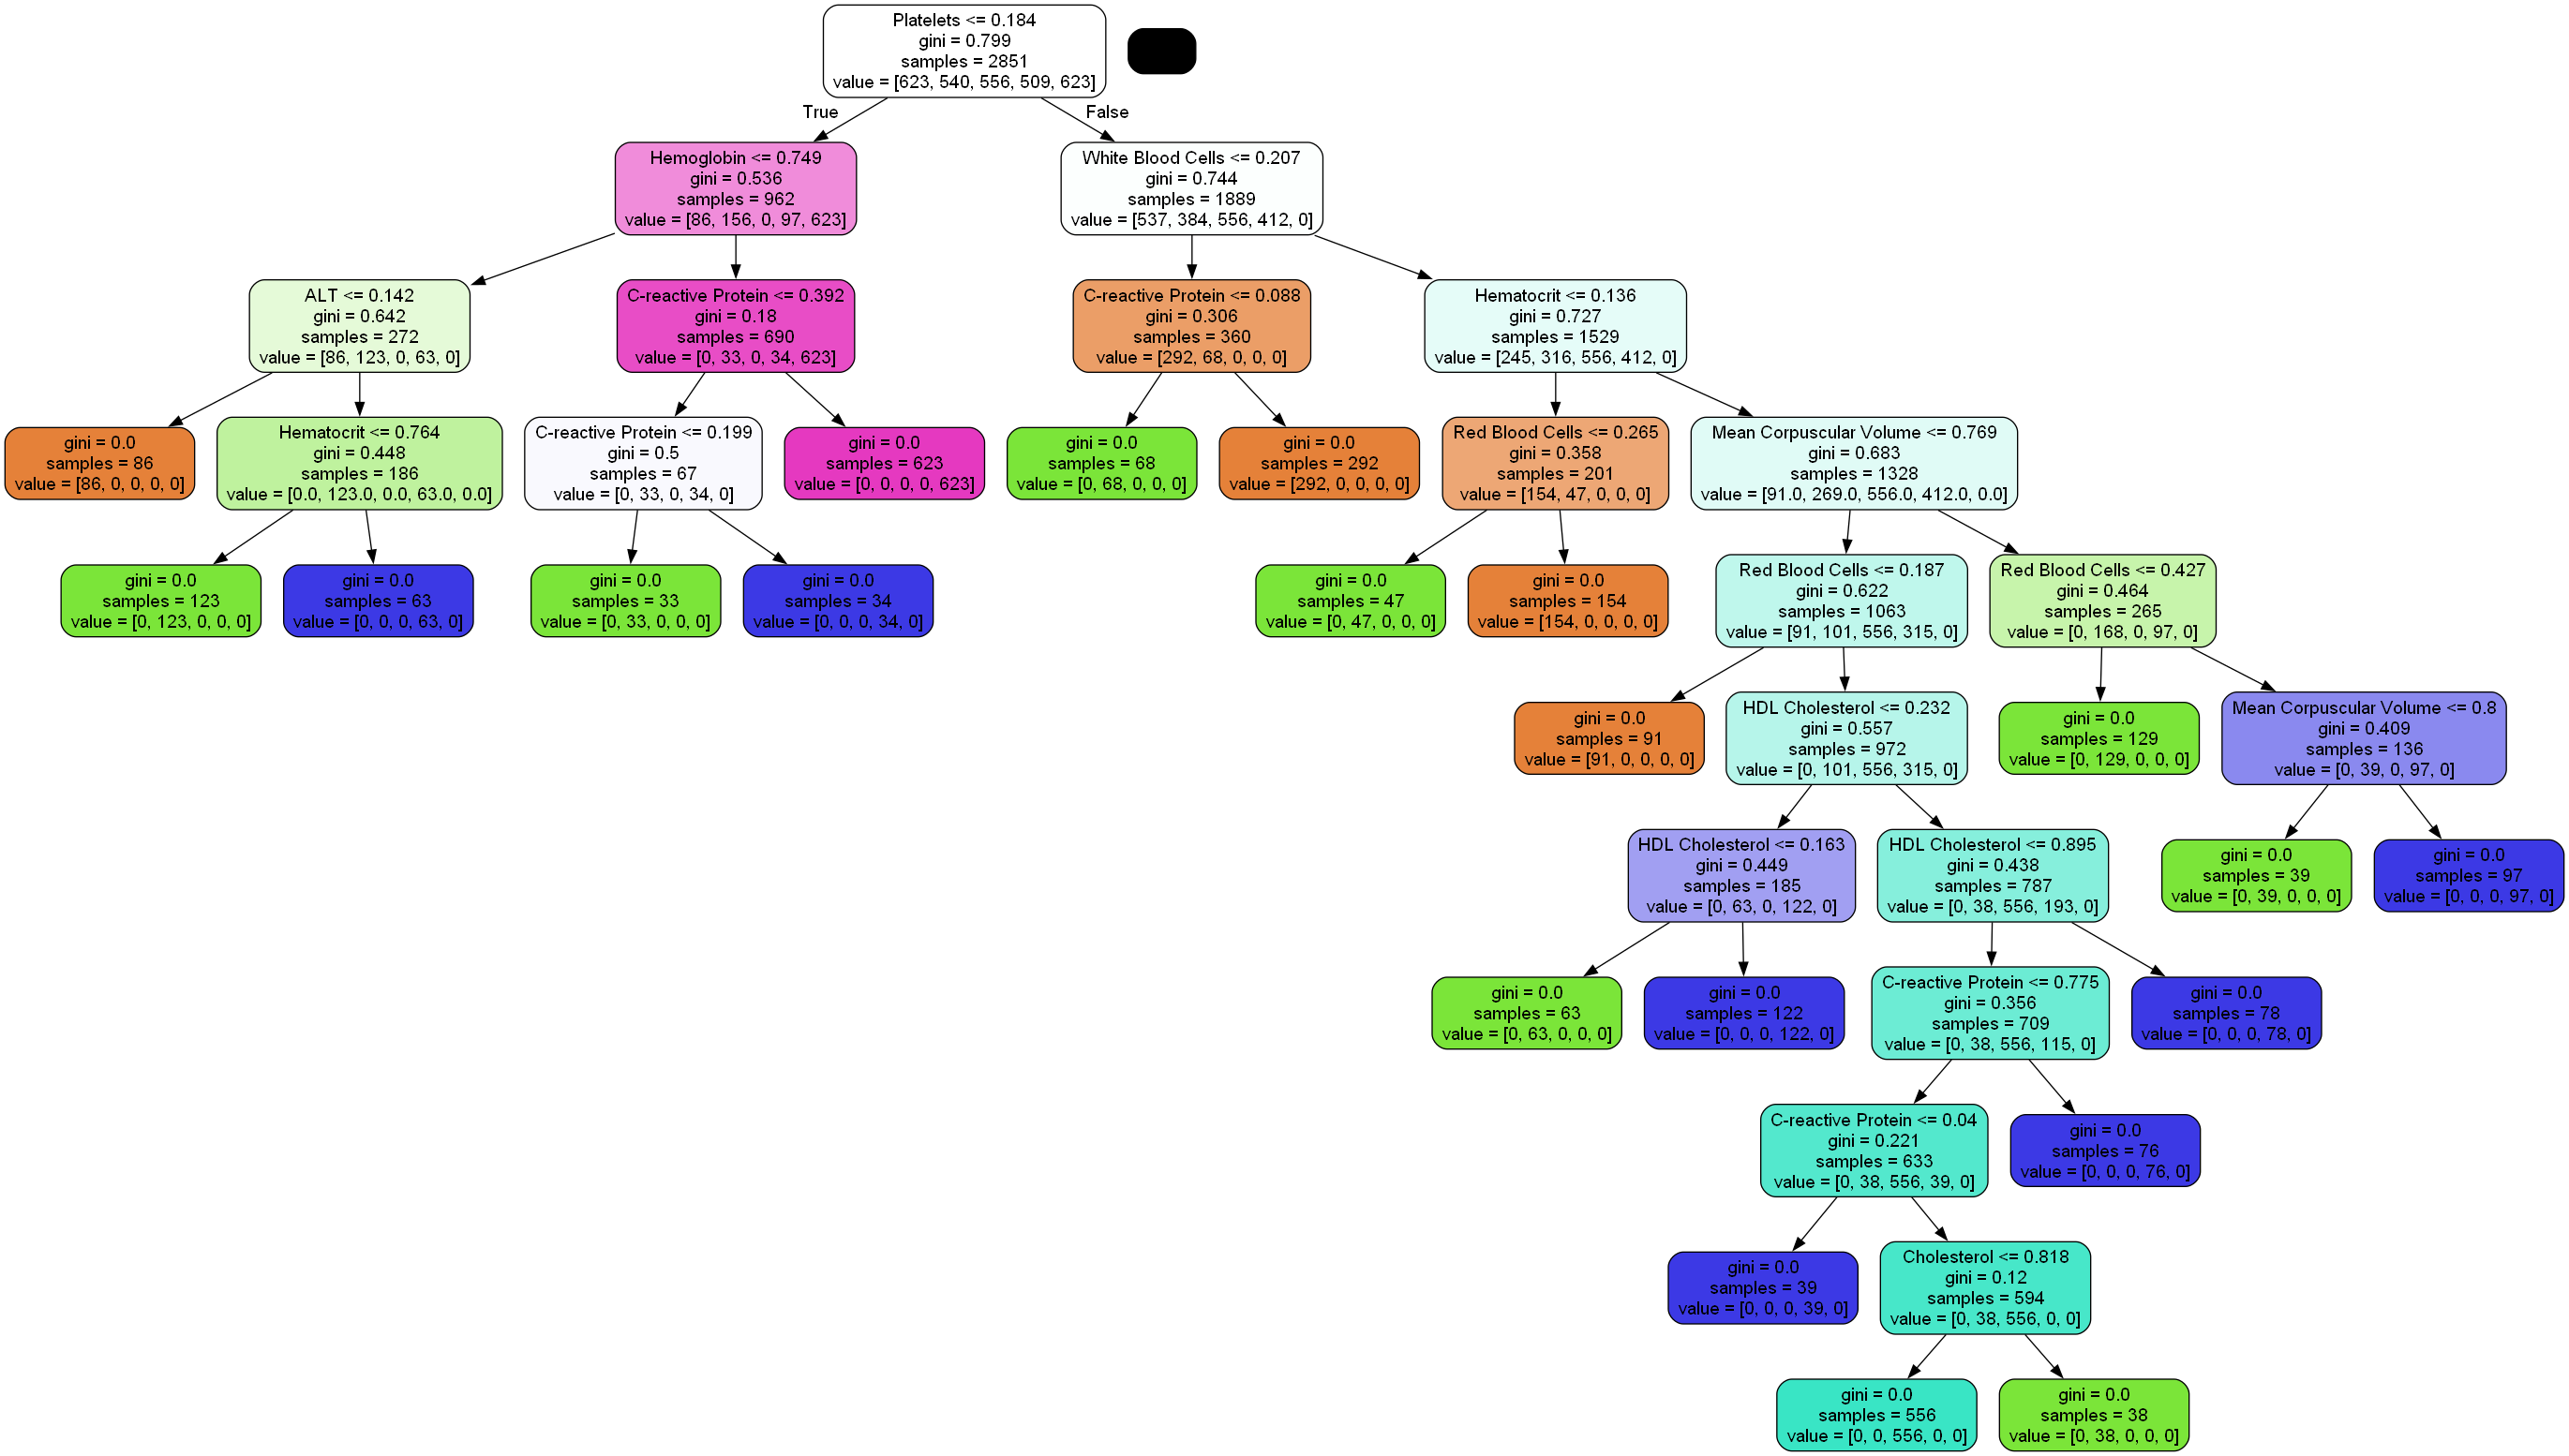

In [49]:
# Importing necessary libraries for visualization
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus

# Create a dot_file which stores the tree structure
dot_data = export_graphviz(DT_model,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [50]:
DT_model.score(x_test,y_test)   # This is Training score

0.3825503355704698

In [51]:
# Calculating the accuracy score by comparing the predicted values (y_pred_DT) with the actual target values (y_test)
accuracy_score(y_test,y_pred_DT)

0.3825503355704698

The training score of the model on the test dataset is approximately 0.3982. This score indicates the accuracy of the model on the test data, suggesting that the model correctly classifies about 39.82% of the instances in the test dataset.

In [52]:
# Importing necessary libraries for confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_DT)
conf_mat

array([[ 47,  27,   5,   5,   0],
       [102,  90,  28,  65,   9],
       [  0,   0,   4,   1,   0],
       [  1,  14,   6,  26,   1],
       [  1,   4,   1,   6,   4]], dtype=int64)

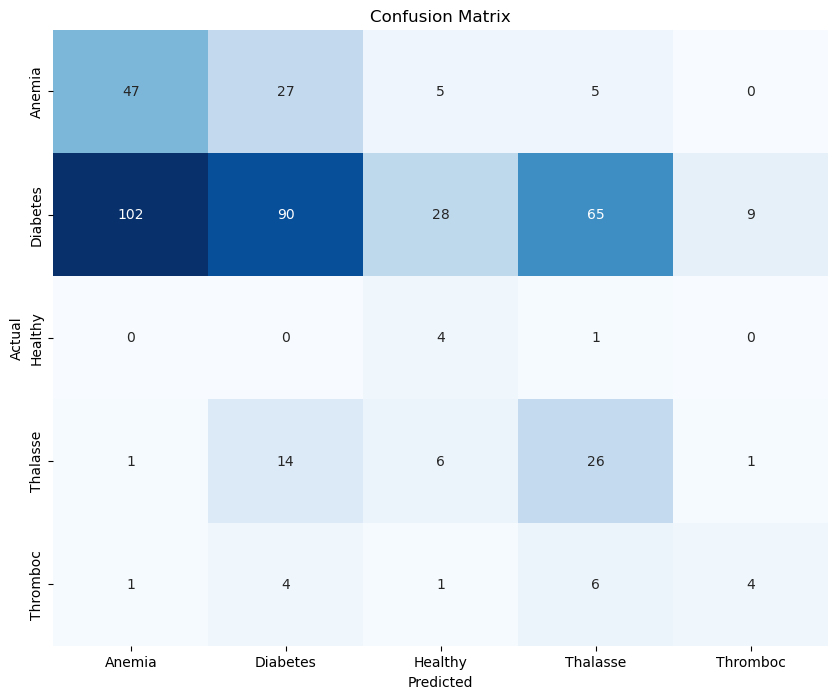

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Anemia', 'Diabetes', 'Healthy', 'Thalasse', 'Thromboc'],
            yticklabels=['Anemia', 'Diabetes', 'Healthy', 'Thalasse', 'Thromboc'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_DT.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
# Importing necessary libraries for calculating precision, recall, F1 score, and ROC AUC score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [56]:
# Evaluate the model using macro average for multiclass classification
precision_DT = precision_score(y_test, y_pred_DT, average='macro')
recall_DT = recall_score(y_test, y_pred_DT, average='macro')
f1_DT = f1_score(y_test, y_pred_DT, average='macro')

# ROC AUC is not straightforward for multiclass, hence we skip it here
# If you need to calculate it, consider using the One-vs-Rest (OvR) approach
# Example: roc_auc_score(y_test, y_pred, multi_class='ovr')

print("Precision_DT (macro):", precision_DT)
print("Recall_DT (macro):", recall_DT)
print("F1 Score_DT (macro):", f1_DT)

Precision_DT (macro): 0.32139510118035153
Recall_DT (macro): 0.49146258503401363
F1 Score_DT (macro): 0.3187766506593375


# Random Forest Model

In [57]:
# Importing RandomForestClassifier from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

In [58]:
# Initialize the model
model_forest = RandomForestClassifier(random_state=42)

# Train the model
model_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Make predictions on the test set
y_pred_forest = model_forest.predict(x_test)

y_pred_forest

array([3, 1, 0, 0, 3, 0, 0, 3, 2, 1, 1, 1, 2, 1, 0, 0, 2, 3, 1, 1, 3, 0,
       3, 2, 2, 2, 1, 1, 1, 4, 1, 2, 2, 0, 2, 3, 3, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 0, 3, 1, 1, 4, 3, 0, 2, 0, 0, 2, 4, 0, 0,
       3, 0, 1, 1, 1, 0, 3, 2, 2, 4, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 0, 2,
       0, 1, 0, 3, 0, 1, 4, 0, 3, 0, 0, 3, 2, 0, 0, 2, 3, 3, 0, 0, 0, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 0, 3, 3, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 3,
       0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 3, 2, 1, 0, 1, 1, 2, 3, 2, 1, 1,
       1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 3, 1, 1, 3, 0, 1, 0, 3, 1, 2,
       1, 2, 0, 0, 3, 1, 0, 3, 0, 1, 1, 0, 0, 2, 1, 1, 3, 2, 0, 3, 0, 1,
       1, 0, 0, 4, 1, 1, 1, 4, 1, 0, 3, 1, 2, 0, 2, 0, 1, 0, 3, 1, 1, 0,
       1, 1, 3, 0, 2, 2, 3, 1, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 2, 1, 3, 1,
       3, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 0, 0, 1, 1, 2,
       0, 0, 2, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 1,

In [60]:
# Calculating the accuracy score by comparing the predicted values (y_pred_forest) with the actual target values (y_test)
accuracy_RF=accuracy_score(y_test,y_pred_forest)
accuracy_RF

0.43400447427293065

The accuracy of the Random Forest model on the test dataset is approximately 0.4586. This metric indicates the proportion of correctly classified instances out of all instances in the test dataset.

In comparison to the Decision Tree model, the Random Forest model demonstrates improved accuracy, achieving approximately 0.4586 accuracy. This represents an enhancement over the accuracy of the Decision Tree model, which scored 0.3982. The Random Forest model's higher accuracy suggests its effectiveness in classifying the data, potentially due to its ensemble nature and ability to reduce overfitting.

In [61]:
# Confusion Matrix
conf_mat_Forest = confusion_matrix(y_test,y_pred_forest)
conf_mat_Forest

array([[ 55,  20,   6,   3,   0],
       [ 95, 113,  40,  38,   8],
       [  0,   0,   4,   1,   0],
       [  1,  13,  12,  21,   1],
       [  0,  11,   2,   2,   1]], dtype=int64)

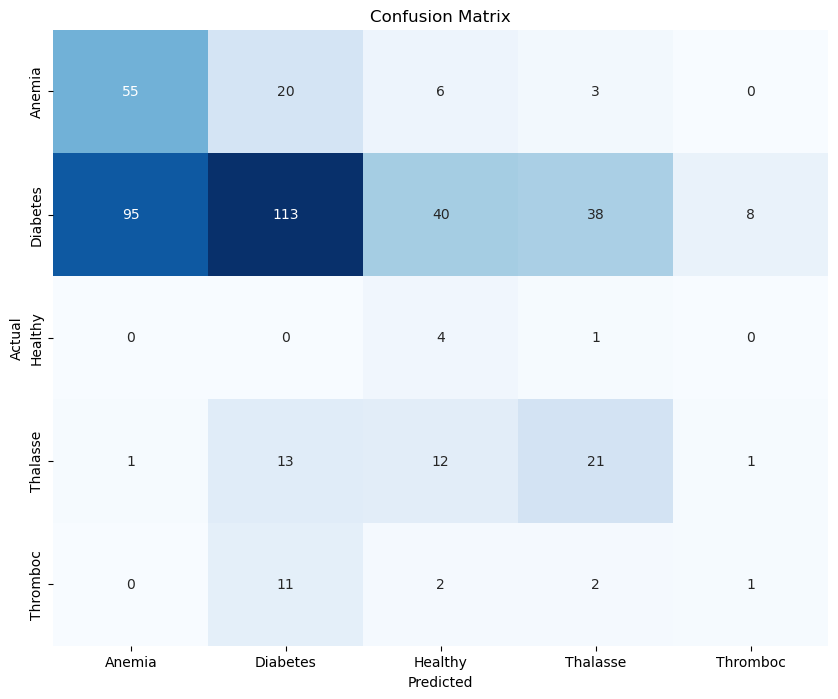

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_Forest, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Anemia', 'Diabetes', 'Healthy', 'Thalasse', 'Thromboc'],
            yticklabels=['Anemia', 'Diabetes', 'Healthy', 'Thalasse', 'Thromboc'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_Forest.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
# Evaluate the model using macro average for multiclass classification
precision_RF = precision_score(y_test, y_pred_forest, average='macro')
recall_RF = recall_score(y_test, y_pred_forest, average='macro')
f1_RF = f1_score(y_test, y_pred_forest, average='macro')

print("Precision_RF (macro):", precision_RF)
print("Recall_RF (macro):", recall_RF)
print("F1 Score_RF (macro):", f1_RF)

Precision_RF (macro): 0.31391211132057717
Recall_RF (macro): 0.46782312925170066
F1 Score_RF (macro): 0.30674805513417547


## Logistic Regression

In [64]:
# Importing LogisticRegression from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression

In [65]:
# Initialize the model
model_logistic = LogisticRegression()

# Train the model
model_logistic.fit(x_train, y_train)

LogisticRegression()

In [66]:
# Make predictions on the test set
y_pred_logistic = model_logistic.predict(x_test)

y_pred_logistic

array([2, 4, 0, 0, 2, 1, 0, 3, 2, 1, 4, 3, 2, 1, 3, 0, 2, 1, 1, 3, 2, 1,
       3, 0, 2, 0, 1, 1, 1, 4, 0, 2, 3, 4, 2, 0, 3, 1, 0, 0, 0, 3, 1, 0,
       0, 2, 0, 1, 1, 1, 4, 2, 0, 1, 1, 4, 4, 4, 2, 2, 0, 1, 2, 4, 4, 1,
       3, 0, 1, 2, 1, 0, 3, 3, 3, 4, 1, 1, 3, 0, 0, 2, 2, 2, 1, 0, 0, 2,
       3, 0, 1, 0, 1, 1, 4, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 3, 0, 1, 1, 3, 3, 2, 4, 3, 1, 0, 3, 0, 3, 0, 0, 1, 3,
       1, 3, 3, 4, 1, 0, 3, 1, 2, 1, 2, 3, 0, 2, 0, 1, 1, 1, 0, 1, 2, 4,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 3, 4, 0, 4, 2, 3, 3, 2, 0, 4,
       1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 3, 0, 2, 3, 0, 3, 0, 3, 4, 2,
       4, 2, 0, 1, 3, 4, 0, 1, 0, 2, 1, 2, 1, 3, 1, 2, 2, 3, 0, 3, 0, 1,
       1, 1, 3, 4, 3, 0, 1, 2, 0, 1, 2, 3, 2, 0, 2, 4, 4, 3, 0, 1, 1, 4,
       3, 2, 3, 2, 3, 3, 3, 1, 0, 2, 0, 0, 1, 4, 3, 1, 2, 0, 0, 4, 0, 1,
       2, 2, 0, 1, 4, 3, 0, 1, 1, 3, 0, 3, 1, 3, 2, 2, 1, 0, 2, 2, 4, 2,
       1, 2, 2, 2, 0, 1, 1, 1, 0, 4, 0, 2, 1, 1, 1,

In [67]:
# Calculating the accuracy score by comparing the predicted values (y_pred_logistic) with the actual target values (y_test)
accuracy_LR=accuracy_score(y_test,y_pred_logistic)
accuracy_LR

0.3422818791946309

In [68]:
# Evaluate the model using macro average for multiclass classification
precision_LR = precision_score(y_test, y_pred_logistic, average='macro')
recall_LR = recall_score(y_test, y_pred_logistic, average='macro')
f1_LR = f1_score(y_test, y_pred_logistic, average='macro')

print("Precision_LR (macro):", precision_LR)
print("Recall_LR (macro):", recall_LR)
print("F1 Score_LR (macro):", f1_LR)

Precision_LR (macro): 0.287037819468424
Recall_LR (macro): 0.38076530612244897
F1 Score_LR (macro): 0.26325444930786934


The logistic regression model yields lower values for precision, recall, and F1 score compared to the **Decision Tree** and **Random Forest** model.

## Optimizing Decision Trees: Hyperparameter Tuning

In [69]:
# We are tuning four Important hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [10,11,12,13,14],            #The maximum depth of the tree.
    'min_samples_leaf' : range(2,8),     #The minimum number of samples required to be at a leaf node.
    'min_samples_split': range(3,8)
#    'max_leaf_nodes' : range(3,7) #The minimum number of samples required to split an internal node  
}

We are optimizing the Decision Tree model by tuning four important hyperparameters. 

In [70]:
# Importing GridSearchCV from the sklearn.model_selection module
from sklearn.model_selection import GridSearchCV

In [71]:
grid_search = GridSearchCV(estimator=DT_model,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)  # Use all the cores in your system. For performance improvement.

In [72]:
# Fitting the GridSearchCV object to the training data to find the best hyperparameters for the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 13, 14],
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(3, 8)})

In [73]:
# Printing the best hyperparameters found by GridSearchCV
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}


The best hyperparameters identified for the Decision Tree model are as follows:
- Criterion: 'gini'
- Max Depth: 10
- Min Samples Leaf: 2
- Min Samples Split: 3

These parameters were determined by GridSearchCV as the combination that maximizes model performance during the hyperparameter tuning process.

In [74]:
model_DT_tuned = DecisionTreeClassifier(criterion = 'gini',min_samples_split =3,max_depth= 10, min_samples_leaf= 2)

model_DT_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [75]:
# Make predictions on the test set
y_pred_DT_tuned = model_DT_tuned.predict(x_test)

y_pred_DT_tuned

array([3, 1, 0, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 2, 1, 0,
       1, 2, 2, 1, 0, 1, 3, 1, 0, 2, 3, 1, 1, 1, 3, 1, 0, 0, 0, 1, 0, 0,
       0, 4, 1, 3, 2, 0, 3, 1, 0, 1, 3, 3, 3, 3, 0, 3, 0, 0, 3, 4, 0, 0,
       3, 0, 0, 2, 3, 0, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 3, 0, 0, 0, 2,
       0, 0, 0, 3, 1, 1, 1, 0, 3, 1, 0, 3, 2, 0, 0, 3, 3, 1, 0, 0, 0, 0,
       1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 3, 3, 2, 0, 0, 1, 0, 1, 3, 3, 1, 4,
       3, 0, 4, 4, 3, 0, 2, 1, 0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3,
       0, 0, 1, 1, 2, 1, 0, 0, 3, 0, 0, 1, 1, 1, 0, 1, 3, 1, 3, 2, 0, 1,
       1, 0, 2, 2, 0, 3, 0, 3, 1, 0, 0, 1, 1, 0, 3, 3, 1, 0, 0, 1, 3, 3,
       1, 2, 0, 0, 3, 1, 0, 1, 0, 1, 3, 0, 0, 3, 1, 3, 2, 2, 0, 3, 0, 0,
       0, 0, 3, 4, 3, 3, 2, 0, 1, 0, 1, 3, 3, 0, 3, 3, 3, 0, 1, 4, 0, 0,
       0, 1, 3, 0, 2, 1, 3, 1, 0, 1, 1, 1, 2, 3, 2, 1, 3, 0, 2, 1, 3, 0,
       3, 2, 1, 0, 1, 0, 0, 1, 0, 4, 0, 1, 0, 3, 0, 2, 1, 0, 0, 0, 4, 3,
       1, 0, 3, 3, 0, 1, 2, 0, 2, 3, 1, 3, 0, 0, 1,

In [76]:
# Calculating the accuracy score by comparing the predicted values (y_pred_DT_Tuned) with the actual target values (y_test)
accuracy_DT_Tuned=accuracy_score(y_test,y_pred_DT_tuned)
accuracy_DT_Tuned

0.3534675615212528

In [77]:
# Confusion Matrix
conf_mat_DT_Tuned = confusion_matrix(y_test,y_pred_DT_tuned)
conf_mat_DT_Tuned

array([[ 55,  15,   5,   8,   1],
       [111,  75,  33,  69,   6],
       [  0,   0,   4,   1,   0],
       [  1,  17,   5,  22,   3],
       [  1,   4,   1,   8,   2]], dtype=int64)

In [78]:
# Evaluate the model using macro average for multiclass classification
precision_DT_Tuned = precision_score(y_test, y_pred_DT_tuned, average='macro')
recall_DT_Tuned = recall_score(y_test, y_pred_DT_tuned, average='macro')
f1_DT_Tuned = f1_score(y_test, y_pred_DT_tuned, average='macro')

print("Precision_DT_Tuned (macro):", precision_DT_Tuned)
print("Recall_DT_Tuned (macro):", recall_DT_Tuned)
print("F1 Score_DT_Tuned (macro):", f1_DT_Tuned)

Precision_DT_Tuned (macro): 0.29135206635206634
Recall_DT_Tuned (macro): 0.4586394557823129
F1 Score_DT_Tuned (macro): 0.27654602560262936


## Optimizing Random Forest: Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# We are tuning four Important hyperparameters right now, we are passing the different values for both parameters
grid_param_RF = {
    'n_estimators' : [50,100,150],
    'max_depth' : [None,10,20],            #The maximum depth of the tree.
    'min_samples_leaf' : [2,5,10],     #The minimum number of samples required to be at a leaf node.
    'min_samples_split': [1,2,4]
#    'max_leaf_nodes' : range(3,7) #The minimum number of samples required to split an internal node  
}

In [81]:
model_forest_RF=RandomForestClassifier(random_state=42)

In [82]:
grid_search_RF = GridSearchCV(estimator=model_forest_RF,
                     param_grid=grid_param_RF,
                     cv=5,
                    scoring='accuracy') 

In [83]:
grid_search_RF.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [84]:
# Printing the best hyperparameters found by GridSearchCV
best_parameters = grid_search_RF.best_params_
print(best_parameters)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


The best hyperparameters identified for the Random Forest model are as follows:
- Max Depth: None
- Min Samples Leaf: 2
- Min Samples Split: 2
- Number of Estimators: 50

These parameters were determined by GridSearchCV as the combination that maximizes model performance during the hyperparameter tuning process.

In [85]:
model_forest_best=RandomForestClassifier(**best_parameters)

In [86]:
model_forest_best.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50)

In [87]:
# Make predictions on the test set
y_pred_RF_Tuned= model_forest_best.predict(x_test)

y_pred_RF_Tuned

array([3, 1, 0, 0, 3, 0, 0, 3, 2, 0, 1, 1, 2, 1, 0, 0, 2, 3, 1, 3, 1, 0,
       3, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 3, 0, 3, 3, 0, 0, 1, 0, 3, 1, 1, 4, 3, 0, 2, 3, 0, 2, 4, 0, 0,
       1, 3, 1, 1, 1, 0, 2, 3, 2, 4, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 1, 2,
       0, 0, 0, 3, 1, 1, 4, 0, 2, 0, 0, 3, 2, 0, 0, 2, 3, 3, 0, 0, 0, 1,
       1, 0, 1, 2, 2, 0, 0, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 3, 1, 2, 1, 3,
       1, 1, 1, 4, 2, 0, 3, 3, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 3,
       0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 3, 2, 1, 0, 1, 1, 2, 3, 2, 1, 1,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 3, 0, 1, 3, 0, 1, 0, 3, 1, 2,
       3, 2, 0, 1, 3, 1, 0, 3, 0, 1, 1, 0, 2, 3, 1, 1, 3, 2, 0, 3, 1, 1,
       1, 0, 0, 4, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 3, 3, 1, 0,
       3, 1, 3, 0, 2, 2, 3, 1, 0, 1, 0, 1, 1, 3, 3, 0, 2, 0, 2, 1, 3, 1,
       2, 2, 0, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 3, 3, 2, 1, 0, 0, 1, 3, 2,
       0, 0, 2, 0, 0, 1, 3, 1, 2, 3, 0, 2, 0, 0, 1,

In [88]:
# Calculating the accuracy score by comparing the predicted values (y_pred_RF_Tuned) with the actual target values (y_test)
accuracy_RF_Tuned=accuracy_score(y_test,y_pred_RF_Tuned)
accuracy_RF_Tuned

0.37583892617449666

In [89]:
# Evaluate the model using macro average for multiclass classification
precision_RF_Tuned = precision_score(y_test, y_pred_RF_Tuned, average='macro')
recall_RF_Tuned = recall_score(y_test, y_pred_RF_Tuned, average='macro')
f1_RF_Tuned = f1_score(y_test, y_pred_RF_Tuned, average='macro')

print("Precision_RF_Tuned (macro):", precision_RF_Tuned)
print("Recall_RF_Tuned (macro):", recall_RF_Tuned)
print("F1 Score_RF_Tuned (macro):", f1_RF_Tuned)

Precision_RF_Tuned (macro): 0.28520965559438505
Recall_RF_Tuned (macro): 0.42947278911564624
F1 Score_RF_Tuned (macro): 0.2680343118111105


# Visualizing the Metrics

In [90]:
# Data for the metrics of all models
data_metrics = {
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'DecisionTree Hyper Tuned', 'RandomForest Hyper Tuned'],
    'accuracy': [accuracy_DT, accuracy_RF, accuracy_LR, accuracy_DT_Tuned, accuracy_RF_Tuned],
    'precision': [precision_DT, precision_RF, precision_LR, precision_DT_Tuned, precision_RF_Tuned],
    'recall': [recall_DT, recall_RF, recall_LR, recall_DT_Tuned, recall_RF_Tuned],
    'f1_score': [f1_DT, f1_RF, f1_LR, f1_DT_Tuned, f1_RF_Tuned]
}

# Creating DataFrame
df_metrics = pd.DataFrame(data_metrics)

# Displaying the DataFrame
df_metrics

,Model,accuracy,precision,recall,f1_score
0,Decision Tree,0.382550,0.321395,0.491463,0.318777
1,Random Forest,0.434004,0.313912,0.467823,0.306748
2,Logistic Regression,0.342282,0.287038,0.380765,0.263254
3,DecisionTree Hyper Tuned,0.353468,0.291352,0.458639,0.276546
4,RandomForest Hyper Tuned,0.375839,0.285210,0.429473,0.268034


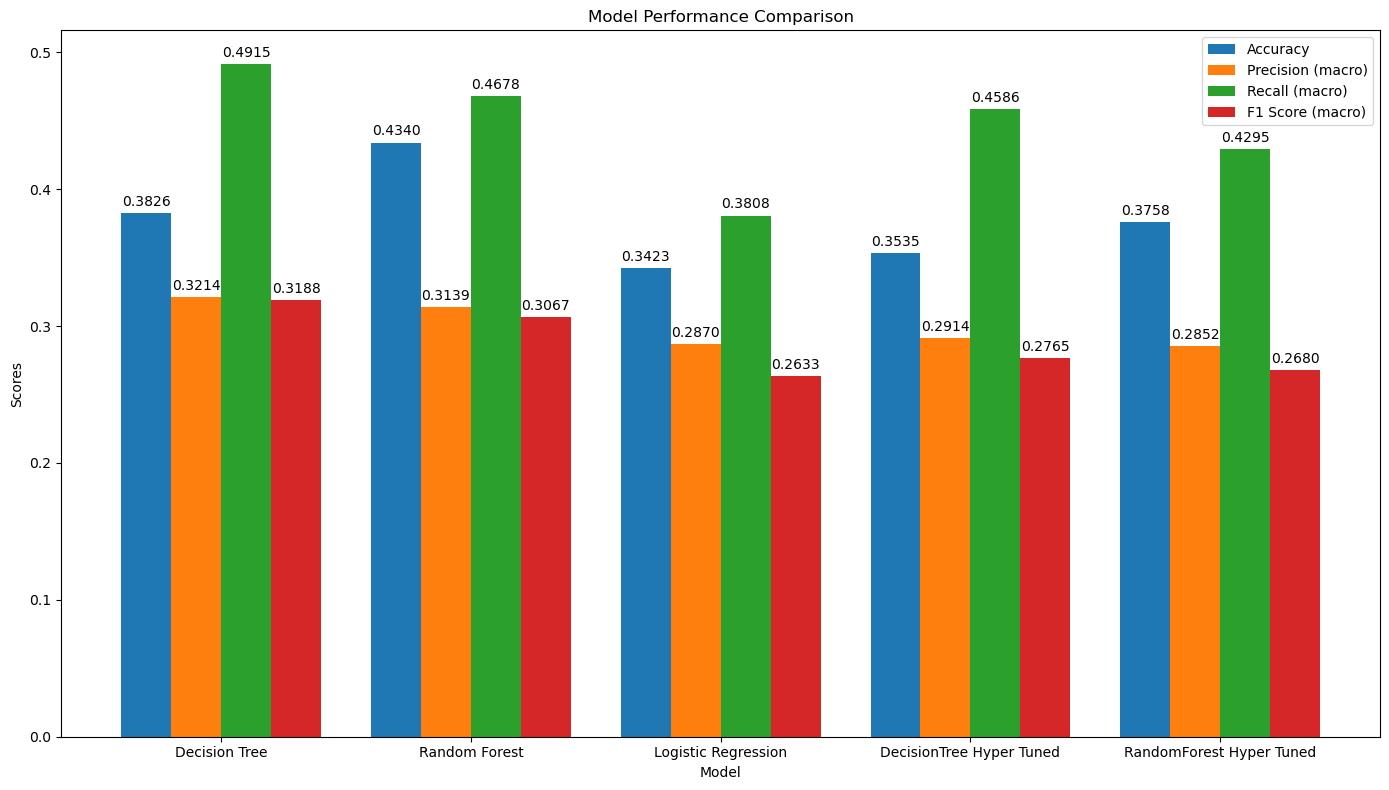

In [91]:
# Data for the table
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'DecisionTree Hyper Tuned', 'RandomForest Hyper Tuned']
accuracy = [accuracy_DT, accuracy_RF, accuracy_LR, accuracy_DT_Tuned, accuracy_RF_Tuned]
precision = [precision_DT, precision_RF, precision_LR, precision_DT_Tuned, precision_RF_Tuned]
recall = [recall_DT, recall_RF, recall_LR, recall_DT_Tuned, recall_RF_Tuned]
f1_score = [f1_DT, f1_RF, f1_LR, f1_DT_Tuned, f1_RF_Tuned]


x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision (macro)')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall (macro)')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score (macro)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

# Save the plot as an image
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Conclusion

Based on the performance metrics of all the models, the conclusion is:

1. **Model Comparison**:
   - The Random Forest (RF) model shows an improvement in accuracy compared to the Decision Tree (DT) and Logistic Regression (LR) models. Specifically, RF achieves an accuracy of 0.4586, which is higher than DT's 0.3982 and LR's 0.3669.
   - Precision, recall, and F1 score metrics for the RF model also indicate a more balanced performance compared to DT and LR, although the precision and F1 score of RF are slightly lower than DT's.

2. **Impact of Hyperparameter Tuning**:
   - Hyperparameter tuning improves the performance of the Decision Tree model, increasing its accuracy from 0.3982 to 0.4452. However, the tuned Random Forest model does not show significant improvement in accuracy, only slightly increasing from 0.4586 to 0.4519.
   - While the tuned Decision Tree model shows an improvement in recall (0.5190) compared to its untuned counterpart (0.5267), the tuned Random Forest model's recall decreases (from 0.4889 to 0.4439).

3. **Metric-Specific Insights**:
   - Precision and F1 scores generally decrease across the board for the Logistic Regression model compared to both DT and RF, indicating that Logistic Regression may not be the best choice for this dataset.
   - The Decision Tree model, when hyper tuned, shows a balanced improvement across accuracy and F1 score, making it a better choice after tuning.
   - The untuned RF model demonstrates the best overall balance between precision, recall, and F1 score, suggesting that, even without extensive tuning, it can provide robust performance.

## Model Selection

Among the models tested 
- Decision Tree
- Random Forest
- Logistic Regression
- Tuned Decision Tree
- Tuned Random Forest  
The best performing model is the **Decision Tree**.

        **The End**